In [1]:
import time
import random
import datetime
import numpy as np
import pandas as pd  
import matplotlib.pyplot as plt

In [2]:
def barChart(data, title, color="blue", ec="white"):
    X = [str(i) for i in range(len(data))]
    Y = data
    plt.figure(figsize=(12, 8))
    plt.bar(X, Y, color=color, ec=ec)
    plt.title(title)
    plt.xlabel("clientes")
    plt.ylabel("tiempo")
    plt.show()

In [3]:
def convertToTimeFormat(value):
    return str(datetime.timedelta(minutes=round(value,1)))

In [4]:
def mixedCongruentialMethod(xo_seed = 5,
                            m_module = 2**4,
                            c_additive_constant = 7,
                            a_multiplier = 5,
                            lower_limit = 0.1,
                            upper_limit = 0.9,
                            to = 10):
    xn1 = 0
    pseudo = 0
    random_numbers = []

    for _ in range(to):
        xo_seed = a_multiplier * xo_seed + c_additive_constant
        xn1 = xo_seed % m_module
        pseudo = ((xn1 + 0.5) / m_module)*(upper_limit - lower_limit)+lower_limit

        if(pseudo < 0):
            pseudo *=(-1)
            
        random_numbers.append(pseudo)
    return random_numbers

In [5]:
def inverseExponentialDistribution(ri, xi):
    return (-1/xi)*np.log(ri)*60  

In [6]:
def simulation(table,clients_number,arrivals,service_capacity,Ri_1,Ri_2):
  for client in range(clients_number):
      random_number_1 = Ri_1[client] 
      inter_arrival_time = inverseExponentialDistribution(random_number_1,arrivals)
      arrival_time = inter_arrival_time if client == 0 else (inter_arrival_time + table['Tiempo de llegada de los clientes'][client - 1])
      atention_time = arrival_time if client == 0 else (max(arrival_time, table['Tiempo de finalización del servicio'][client - 1]))
      wait_time = atention_time - arrival_time

      random_number_2 =  Ri_2[client]
      service_time = inverseExponentialDistribution(random_number_2,service_capacity)
      service_end_time = atention_time + service_time
      service_idle_time = 0 if client == 0 else 0 if table['Tiempo de finalización del servicio'][client - 1] > arrival_time else arrival_time - table['Tiempo de finalización del servicio'][client - 1]
      server_usage_percentage = (inter_arrival_time / service_time)/100
      percentage_of_idle_server_time = (1 - server_usage_percentage)

      table['Aleatorio 1'].append(round(random_number_1, 2))
      table['Tiempo entre llegadas'].append(round(inter_arrival_time,2))
      table['Tiempo de llegada de los clientes'].append(round(arrival_time,2))
      table['Tiempo de atencion al cliente'].append(round(atention_time,2))
      table['Tiempo de espera'].append(round(wait_time,2))

      table['Aleatorio 2'].append(round(random_number_2,2))
      table['Tiempo en que se atiende el cliente'].append(round(service_time,2))
      table['Tiempo de finalización del servicio'].append(round(service_end_time,2))
      table['Tiempo ocioso del servicio'].append(round(service_idle_time,2))
      
      table['Porcentaje de uso del servidor'].append(round(server_usage_percentage,2))
      table['Porcentaje de tiempo del servidor ocioso'].append(round(percentage_of_idle_server_time,2))

  return table

In [7]:
def console():
    _input = input('CMD: Límite inferior: ')
    lower_limit = float(_input) if _input != '' else 0.0

    _input = input('CMD: Límite superior: ')
    upper_limit = float(_input) if _input != '' else 1.0

    if lower_limit >= upper_limit:
        print('ERROR: lower limit is greater than upper limit')
        return

    _input = input('CMD: Cantidad de clientes: ')
    clients_number = int(_input) if _input != '' else 50

    _input = input('CMD: Promedio de llegadas de los clientes: ')
    arrivals = int(_input) if _input != '' else 20

    _input = input('CMD: Primedio de la capacidad del servicio: ')
    service_capacity = int(_input) if _input != '' else 30

    return [lower_limit, upper_limit, clients_number, arrivals, service_capacity]


In [8]:
def results(table, clients_number):
    total_wait = sum(table['Tiempo de espera'])
    average_total_wait = total_wait/clients_number
    total_idle_time = sum(table['Tiempo ocioso del servicio'])
    average_idle_time = total_idle_time/clients_number
    total_service_time = sum(table['Tiempo en que se atiende el cliente'])
    total_time_of_service_in_the_job = table['Tiempo de finalización del servicio'][-1]

    resume = {
        "Numero de clientes atendidos":[clients_number,clients_number],
        "Tiempo total de espera":[round(total_wait, 2),convertToTimeFormat(total_wait)],
        "Tiempo promedio total de espera":[round(average_total_wait, 2), convertToTimeFormat(average_total_wait)],
        "Tiempo ocioso total del servicio":[round(total_idle_time, 2),convertToTimeFormat(total_idle_time)],
        "Tiempo ocioso promedio por cliente":[ round(average_idle_time, 2),convertToTimeFormat(average_idle_time)],
        "Tiempo total de atendimientos":[round(total_service_time, 2),convertToTimeFormat(total_service_time)],
        "Tiempo total del servicio en el puesto de trabajo":[round(total_time_of_service_in_the_job, 2),convertToTimeFormat(total_time_of_service_in_the_job)],
    }

    print()
    print("INFO: Numero de clientes atendidos:", clients_number)
    print("INFO: Tiempo total de espera:", round(total_wait, 2), ' - ', convertToTimeFormat(total_wait))
    print("INFO: Tiempo promedio total de espera:", round(average_total_wait, 2), ' - ', convertToTimeFormat(average_total_wait))
    print("INFO: Tiempo ocioso total del servicio:", round(total_idle_time, 2), ' - ', convertToTimeFormat(total_idle_time))
    print("INFO: Tiempo ocioso promedio por cliente:", round(average_idle_time, 2), ' - ', convertToTimeFormat(average_idle_time))
    print("INFO: Tiempo total de atendimientos:", round(total_service_time, 2), ' - ', convertToTimeFormat(total_service_time))
    print("INFO: Tiempo total del servicio en el puesto de trabajo:", round(total_time_of_service_in_the_job, 2), ' - ', convertToTimeFormat(total_time_of_service_in_the_job))
    print()
    return resume


In [9]:
def main(table):
    lower_limit, upper_limit, clients_number, arrivals, service_capacity = console()
    seed_1 = random.randint(1,int(time.time()))
    seed_2 = random.randint(1,int(time.time()))
    Ri_1 = mixedCongruentialMethod(xo_seed = seed_1, to = clients_number, lower_limit = lower_limit, upper_limit = upper_limit)
    Ri_2 = mixedCongruentialMethod(xo_seed = seed_2, to = clients_number, lower_limit = lower_limit, upper_limit = upper_limit)
    table =  simulation(table,clients_number,arrivals,service_capacity,Ri_1,Ri_2) 
    resume = results(table,clients_number)
    return table,resume
    

In [10]:
table = {
    'Aleatorio 1': [],
    'Tiempo entre llegadas': [],
    'Tiempo de llegada de los clientes': [],
    'Tiempo de atencion al cliente': [],
    'Tiempo de espera': [],
    'Aleatorio 2': [],
    'Tiempo en que se atiende el cliente': [],
    'Tiempo de finalización del servicio': [],
    'Tiempo ocioso del servicio': [],
    'Porcentaje de uso del servidor': [],
    'Porcentaje de tiempo del servidor ocioso': [],
}
table,resume = main(table)


INFO: Numero de clientes atendidos: 50
INFO: Tiempo total de espera: 221.91  -  3:41:54
INFO: Tiempo promedio total de espera: 4.44  -  0:04:24
INFO: Tiempo ocioso total del servicio: 49.31  -  0:49:18
INFO: Tiempo ocioso promedio por cliente: 0.99  -  0:01:00
INFO: Tiempo total de atendimientos: 95.54  -  1:35:30
INFO: Tiempo total del servicio en el puesto de trabajo: 149.44  -  2:29:24



In [11]:
pd.DataFrame(table)

,Aleatorio 1,Tiempo entre llegadas,Tiempo de llegada de los clientes,Tiempo de atencion al cliente,Tiempo de espera,Aleatorio 2,Tiempo en que se atiende el cliente,Tiempo de finalización del servicio,Tiempo ocioso del servicio,Porcentaje de uso del servidor,Porcentaje de tiempo del servidor ocioso
0,0.22,4.56,4.56,4.56,0.00,0.84,0.34,4.90,0.00,0.13,0.87
1,0.41,2.70,7.26,7.26,0.00,0.53,1.27,8.53,2.36,0.02,0.98
2,0.34,3.20,10.46,10.46,0.00,0.97,0.06,10.53,1.93,0.50,0.50
3,0.03,10.40,20.86,20.86,0.00,0.16,3.71,24.57,10.33,0.03,0.97
4,0.47,2.27,23.13,24.57,1.44,0.09,4.73,29.30,0.00,0.00,1.00
5,0.66,1.26,24.39,29.30,4.91,0.78,0.49,29.79,0.00,0.03,0.97
6,0.59,1.56,25.95,29.79,3.84,0.22,3.04,32.83,0.00,0.01,0.99
7,0.28,3.81,29.76,32.83,3.07,0.41,1.80,34.63,0.00,0.02,0.98
8,0.72,0.99,30.75,34.63,3.88,0.34,2.14,36.77,0.00,0.00,1.00
9,0.91,0.30,31.05,36.77,5.72,0.03,6.93,43.70,0.00,0.00,1.00


In [12]:
pd.DataFrame(resume)

,Numero de clientes atendidos,Tiempo total de espera,Tiempo promedio total de espera,Tiempo ocioso total del servicio,Tiempo ocioso promedio por cliente,Tiempo total de atendimientos,Tiempo total del servicio en el puesto de trabajo
0,50,221.91,4.44,49.31,0.99,95.54,149.44
1,50,3:41:54,0:04:24,0:49:18,0:01:00,1:35:30,2:29:24


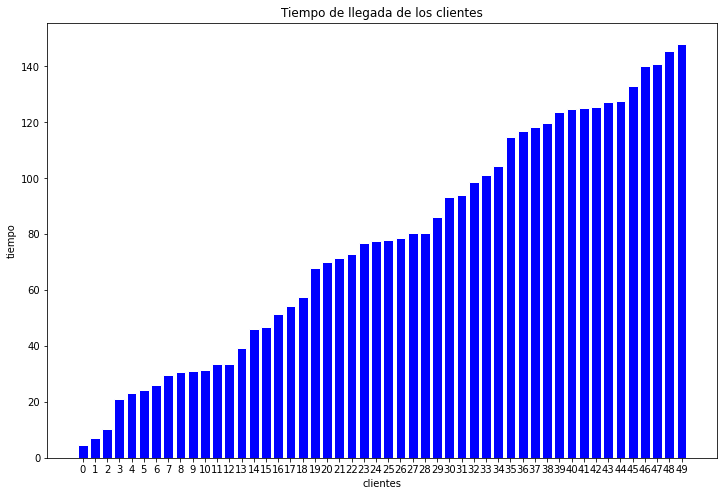

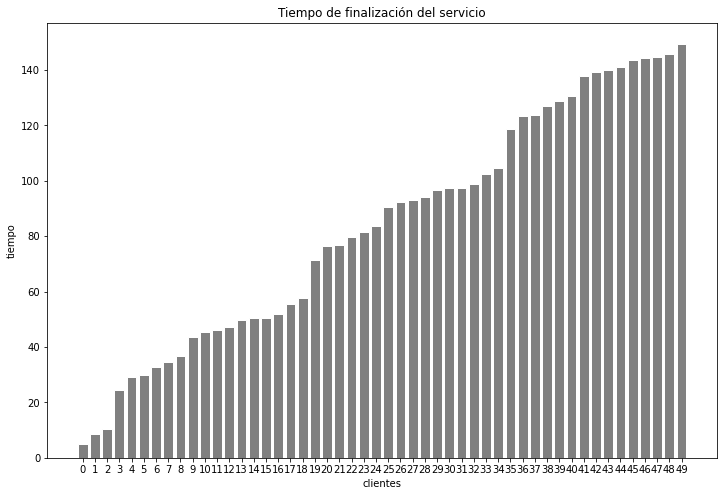

In [13]:
title = 'Tiempo de llegada de los clientes'
barChart(table[title],title)
title = 'Tiempo de finalización del servicio'
barChart(table[title],title,color = 'gray')